Accuracy: 0.95
Precision: 0.92
F1 Score: 0.96


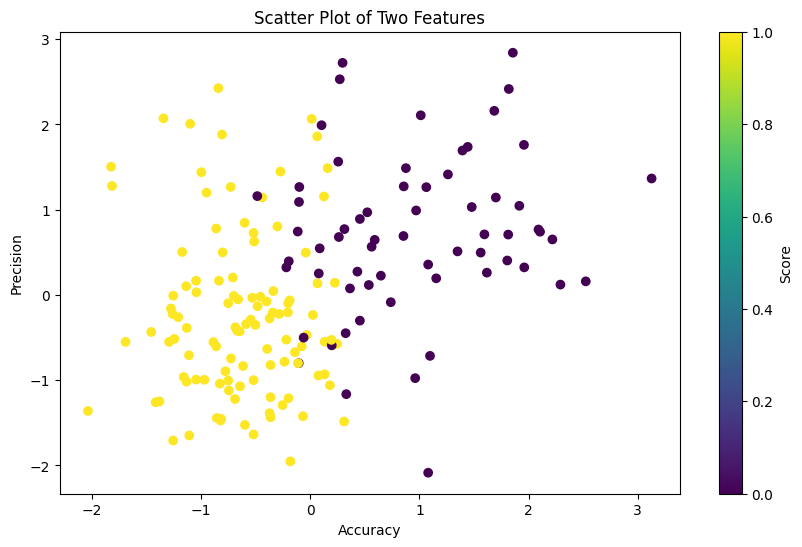

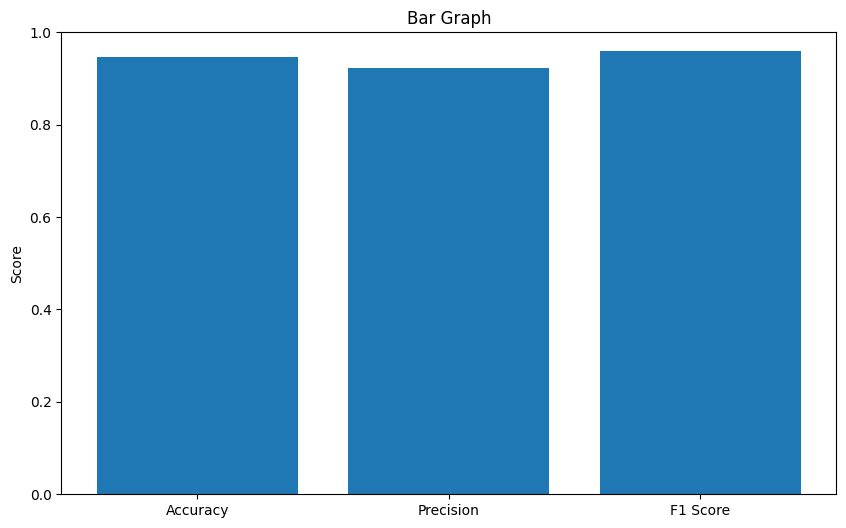

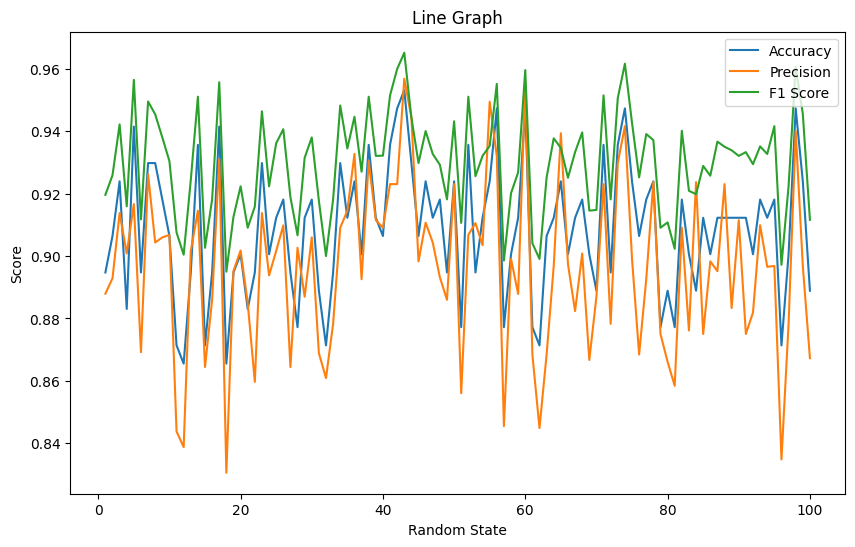

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Breast_cancer_data.csv')

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis')
plt.title('Scatter Plot of Two Features')
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.colorbar(label='Score')
plt.show()

# Bar Graph
metrics = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values())
plt.title('Bar Graph')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()

# Line Graph
random_states = np.arange(1, 101)
accuracies = []
precisions = []
f1_scores = []

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(random_states, accuracies, label='Accuracy')
plt.plot(random_states, precisions, label='Precision')
plt.plot(random_states, f1_scores, label='F1 Score')
plt.title('Line Graph')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.legend()
plt.show()
